Importing Data

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
data = pd.read_excel('transaction.xlsx')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


The dataset contains transactions for 100 customers including purchases, recurring transactions, and salary transactions over a 3 month period.

In [128]:
pd.DataFrame({'Columns': data.columns})

,Columns
0,status
1,card_present_flag
2,bpay_biller_code
3,account
4,currency
5,long_lat
6,txn_description
7,merchant_id
8,merchant_code
9,first_name


In [129]:
print('data shape: ',data.shape)

data shape:  (12043, 23)


Checklist:
    1. 100 unique customers(customer_id)
    2. Each row corresponds to a unique transaction ID (transaction_id)
    3. 3 months worth of data (date)

In [130]:
print("Number of unique customer id: ", data['customer_id'].nunique())

Number of unique customer id:  100


In [131]:
print("Number of rows in dataset: ", len(data))
print("Number of unique transaction ID: ", data['transaction_id'].nunique())

Number of rows in dataset:  12043
Number of unique transaction ID:  12043


In [132]:
data.date.describe()

/var/folders/jk/yhf9nmf13fx53c_nvyc83nsh0000gn/T/ipykernel_86130/3984613233.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.date.describe()


count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

We do indeed have 3 months worth of data from 2018-08-01 to 2018-10-31.
However, there are only 91 unique days, which means that there is 1 day missing

In [133]:
pd.date_range(start='2018-08-01', end='2018-10-31').difference(data.date)

DatetimeIndex(['2018-08-16'], dtype='datetime64[ns]', freq=None)

The missing date is 2018-08-16

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

Missing Values: 

In [135]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing_percentage = round(missing / len(data),3) * 100
pd.DataFrame({'Number of missing values': missing, 'Percentage': missing_percentage}).sort_values(by = 'Percentage', ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


Descriptive statistics of numerical variables:

In [136]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


There is a huge spread between the maximum and minimum in the balance and amount column 

Exploratory Data Analysis
Categorical Variables

In [137]:
data['status'].value_counts(dropna = False)

authorized    7717
posted        4326
Name: status, dtype: int64

Authorized: Transaction has already been apporved
Posted: Transaction is still in process

In [138]:
data['card_present_flag'].value_counts(dropna = False)

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

In [139]:
data['currency'].value_counts(dropna = False)

AUD    12043
Name: currency, dtype: int64

In [140]:
data['long_lat'].head()

0    153.41 -27.95
1    153.41 -27.95
2    151.23 -33.94
3    153.10 -27.66
4    153.41 -27.95
Name: long_lat, dtype: object

In [141]:
data['txn_description'].value_counts(dropna = False)

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

/Users/kaizhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by category')

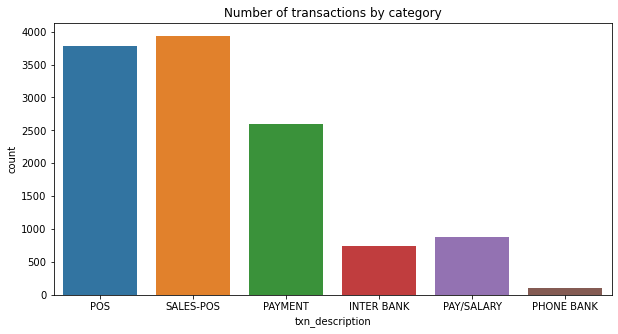

In [142]:
plt.figure(figsize = (10,5))
sns.countplot(data.txn_description)
plt.title('Number of transactions by category')

Transactions are mostly consist of sales payment.
Also, this might explain the missing values in the merchant columns as not all transactions
are purchases of goods and services from merchants

In [143]:
data[['txn_description','amount']].groupby('txn_description', as_index = False).mean().sort_values('amount', ascending=False)

,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


Text(0.5, 1.0, 'Average transaction volume by category')

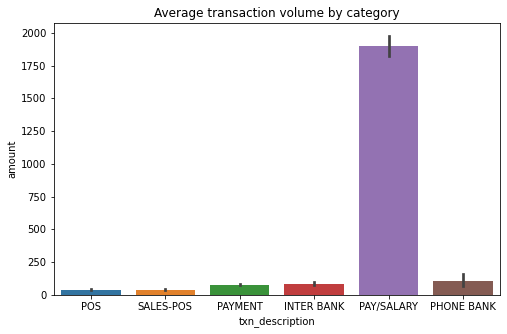

In [144]:
plt.figure(figsize=(8,5))
sns.barplot(x='txn_description', y='amount', data = data)
plt.title('Average transaction volume by category')


In [145]:
data['gender'].value_counts(dropna = False)

M    6285
F    5758
Name: gender, dtype: int64

/Users/kaizhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by gender')

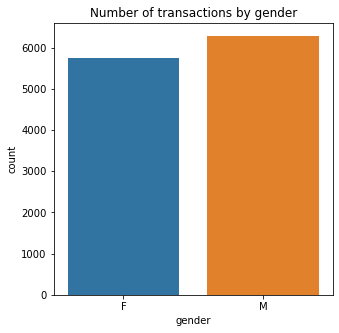

In [146]:
plt.figure(figsize=(5,5))
sns.countplot(data['gender'])
plt.title('Number of transactions by gender')


In [147]:
data[['gender','amount']].groupby('gender', as_index = False).mean().sort_values(by='amount', ascending = False)

,gender,amount
1,M,205.721809
0,F,168.517303


Text(0.5, 1.0, 'Average transaction volume by gender')

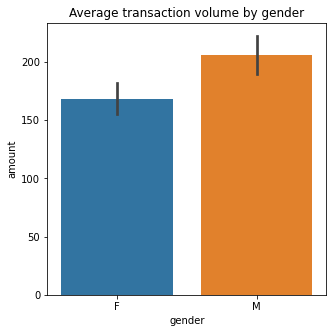

In [148]:
plt.figure(figsize = (5,5))
sns.barplot(x = 'gender', y='amount', data=data)
plt.title('Average transaction volume by gender')

In [149]:
data['merchant_suburb'].value_counts(dropna = False)

NaN                  4326
Melbourne             255
Sydney                233
Southport              82
Brisbane City          79
                     ... 
Cowell                  1
Tweed Heads South       1
Ballandean              1
Sydenham                1
Kings Park              1
Name: merchant_suburb, Length: 1610, dtype: int64

In [150]:
data['merchant_state'].value_counts(dropna = False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

/Users/kaizhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NameError: name 'plt_title' is not defined

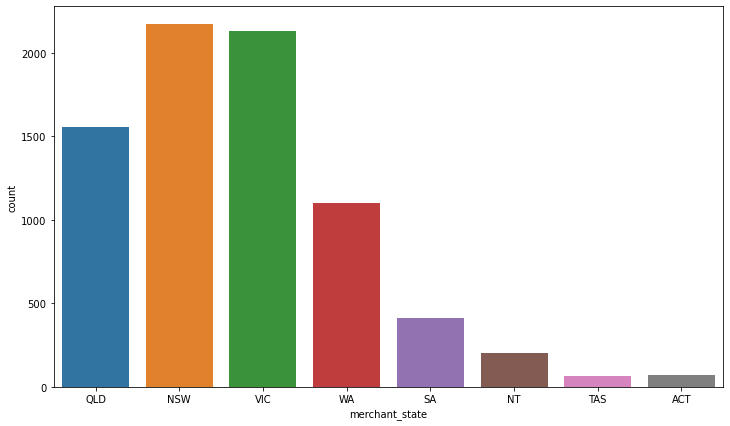

In [151]:
plt.figure(figsize = (12,7))
sns.countplot(data['merchant_state'])
plt_title('Number of transactions by state')

In [153]:
data[['merchant_state','amount']].groupby('merchant_state', as_index = False).mean().sort_values(by = 'amount', ascending = False)

,merchant_state,amount
0,ACT,66.803836
1,NSW,47.036316
2,NT,44.726293
6,VIC,41.099953
4,SA,40.425470
3,QLD,34.372397
7,WA,30.901873
5,TAS,28.866618


Text(0.5, 1.0, 'Average transaction volume by state')

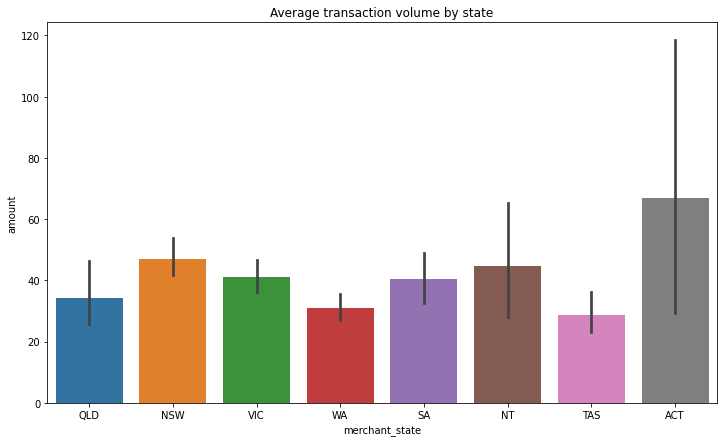

In [154]:
plt.figure(figsize= (12,7))
sns.barplot(x='merchant_state', y = 'amount', data = data)
plt.title('Average transaction volume by state')

In [155]:
data['extraction'].head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [156]:
data['country'].value_counts(dropna = False)

Australia    12043
Name: country, dtype: int64

In [157]:
data['movement'].value_counts(dropna = False)

debit     11160
credit      883
Name: movement, dtype: int64

/Users/kaizhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of transactions by movement')

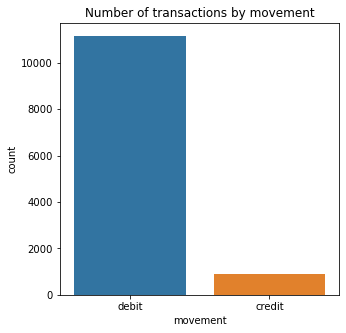

In [158]:
plt.figure(figsize = (5,5))
sns.countplot(data['movement'])
plt.title('Number of transactions by movement')

Text(0.5, 1.0, 'Average transaction volume by movement')

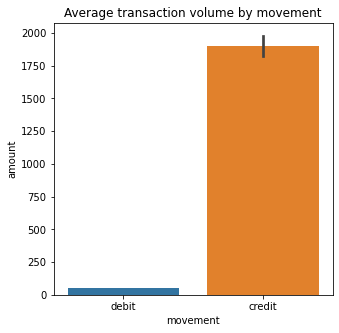

In [159]:
plt.figure(figsize = (5,5))
sns.barplot(x='movement', y='amount', data=data)
plt.title('Average transaction volume by movement')

/Users/kaizhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Balance distribution')

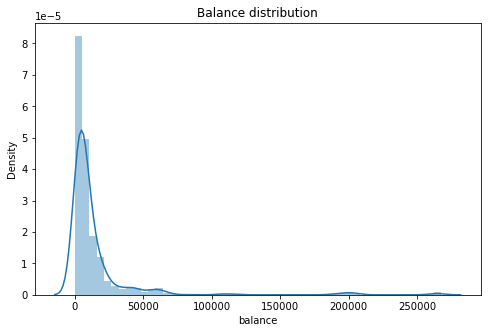

In [160]:
plt.figure(figsize=(8,5))
sns.distplot(data.balance)
plt.title('Balance distribution')

/Users/kaizhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

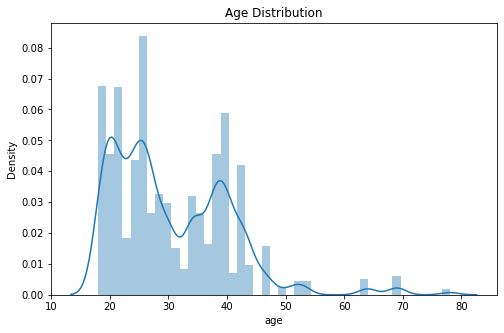

In [161]:
plt.figure(figsize = (8,5))
sns.distplot(data.age)
plt.title('Age Distribution')

/Users/kaizhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Amount distribution')

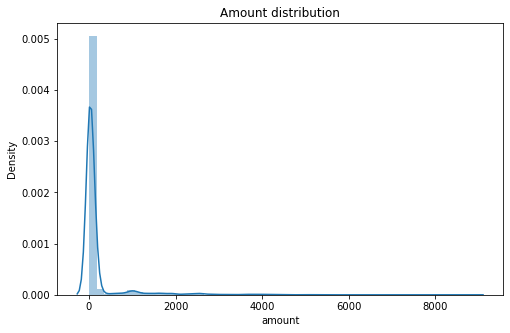

In [162]:
plt.figure(figsize = (8,5))
sns.distplot(data.amount)
plt.title('Amount distribution')

Dropping unwanted columns

In [163]:
print('Before: ',data.shape)
data = data.drop(['currency', 'country'], axis = 1)
print('After: ',data.shape)

Before:  (12043, 23)
After:  (12043, 21)


In [164]:
pd.DataFrame({'Number of missing values': missing, 'Percentage': missing_percentage}).sort_values(by = 'Percentage', ascending = False)

,Number of missing values,Percentage
bpay_biller_code,11158,92.7
merchant_code,11160,92.7
card_present_flag,4326,35.9
merchant_id,4326,35.9
merchant_suburb,4326,35.9
merchant_state,4326,35.9
merchant_long_lat,4326,35.9


In [165]:
nonSales = data.loc[(data.txn_description != 'SALES_POS') | (data.txn_description != 'POS'), :]
nonSales.isnull().sum().sort_values(ascending = False)

merchant_code        11160
bpay_biller_code     11158
merchant_suburb       4326
merchant_long_lat     4326
merchant_id           4326
card_present_flag     4326
merchant_state        4326
status                   0
customer_id              0
transaction_id           0
amount                   0
extraction               0
date                     0
age                      0
gender                   0
balance                  0
first_name               0
txn_description          0
long_lat                 0
account                  0
movement                 0
dtype: int64

In [166]:
cols = ["card_present_flag", "merchant_state", "merchant_suburb", "merchant_id", "merchant_long_lat"]
for col in cols:
    data[col].fillna("n/a", inplace = True)


In [167]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending = False)

merchant_code       11160
bpay_biller_code    11158
dtype: int64

In [168]:
data = data.drop(['merchant_code','bpay_biller_code'], axis = 1)

In [169]:
data.isnull().sum().max()

0

In [170]:
daily_amount = pd.DataFrame(data.groupby('date').amount.sum())
daily_amount.head()

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


Text(0, 0.5, 'Transaction Volume')

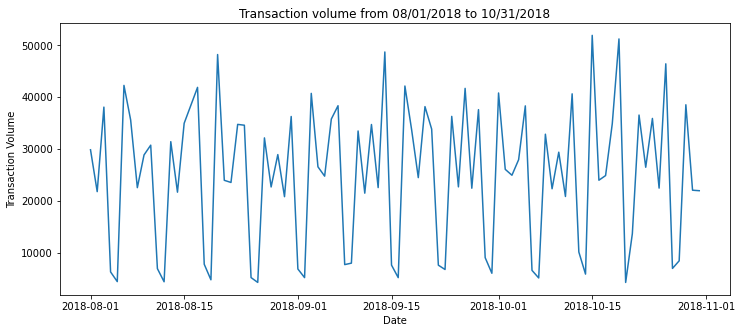

In [171]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(daily_amount.index, daily_amount.amount)
plt.title('Transaction volume from 08/01/2018 to 10/31/2018')
plt.xlabel('Date')
plt.ylabel('Transaction Volume')

There appears to be a cyclical pattern in transaction volume over the 3 month period.
Hypothesis: 
    1. Salaries are paid out only on certain days of the week.
    2. People tend to spend more during the weekends

In [172]:
data['month'] = pd.DatetimeIndex(data.date).month
data['dayofweek'] = pd.DatetimeIndex(data.date).dayofweek
data[['date','month','dayofweek']].head()

,date,month,dayofweek
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2


In [173]:
data.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [174]:
data["extraction"] = [timestamp.split("T")[1].split(".")[0] for timestamp in data.extraction]
data.extraction.head()

0    01:01:15
1    01:13:45
2    01:26:15
3    01:38:45
4    01:51:15
Name: extraction, dtype: object

In [175]:
data['hour'] = [time.split(':')[0] for time in data.extraction]
data[['extraction','hour']].head()

,extraction,hour
0,01:01:15,01
1,01:13:45,01
2,01:26:15,01
3,01:38:45,01
4,01:51:15,01


In [176]:
data.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,...,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,month,dayofweek,hour
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,...,QLD,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,8,2,01
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,...,NSW,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,8,2,01
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,...,NSW,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,8,2,01
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,F,...,QLD,01:38:45,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,8,2,01
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,F,...,QLD,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,8,2,01


In [177]:
purchase_amount = data.loc[(data.txn_description == 'POS') | (data.txn_description == 'SALES-POS'), 'amount']
purchase_amount.head()

0    16.25
1    14.19
2     6.42
3    40.90
4     3.25
Name: amount, dtype: float64

/Users/kaizhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Purchase transaction amount')

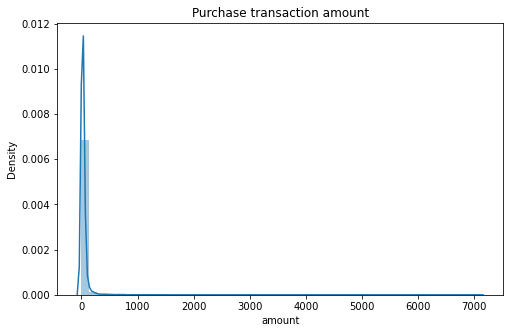

In [178]:
plt.figure(figsize = (8,5))
sns.distplot(purchase_amount)
plt.title('Purchase transaction amount')

In [179]:
purchase_amount.describe()

count    7717.000000
mean       40.153732
std       149.833070
min         0.100000
25%        12.080000
50%        19.700000
75%        33.910000
max      7081.090000
Name: amount, dtype: float64

/Users/kaizhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Overall transaction amount')

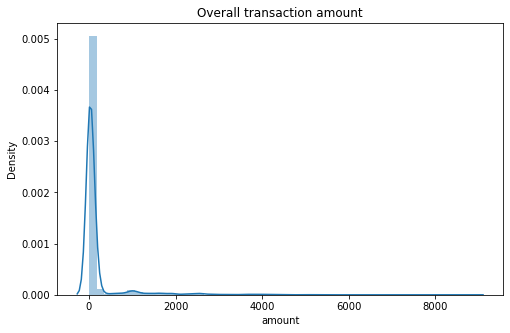

In [180]:
plt.figure(figsize=(8,5))
sns.distplot(data.amount)
plt.title('Overall transaction amount')

In [181]:
data.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [182]:
customer_monthly_volume = pd.DataFrame(data.groupby('customer_id').amount.sum()/3)
customer_monthly_volume.head()

,amount
customer_id,
CUS-1005756958,5422.990000
CUS-1117979751,11328.123333
CUS-1140341822,5670.200000
CUS-1147642491,9660.273333
CUS-1196156254,12016.906667


/Users/kaizhang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "Customers' monthly transaction volume")

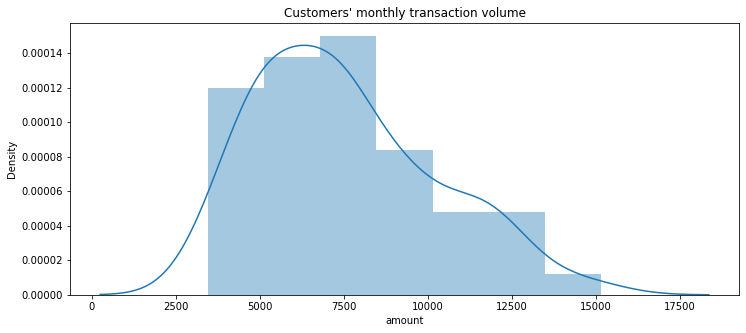

In [183]:
plt.figure(figsize = (12,5))
sns.distplot(customer_monthly_volume.amount)
plt.title("Customers' monthly transaction volume")

Text(0.5, 1.0, 'Average transaction volume by month')

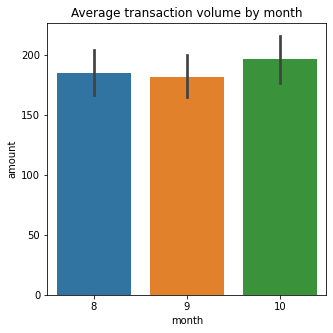

In [184]:
plt.figure(figsize = (5,5))
sns.barplot(x='month', y='amount', data=data)
plt.title('Average transaction volume by month')

In [185]:
avg_daily_volume = pd.DataFrame(data.groupby('dayofweek').amount.mean())
avg_daily_volume.head()

,amount
dayofweek,
0,373.221000
1,221.576456
2,195.215570
3,184.010422
4,249.353517


Text(0, 0.5, 'Transction Volume')

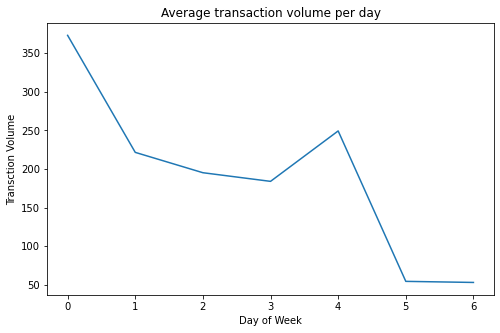

In [186]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(avg_daily_volume.index, avg_daily_volume.amount)
plt.title('Average transaction volume per day')
plt.xlabel('Day of Week')
plt.ylabel('Transction Volume')

Saturday and Sunday have the lowest average transaction volume

In [187]:
data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [193]:
data.loc[data.txn_description == 'PAY/SALARY', 'category'] = 'Salary'
data.loc[(data.txn_description == 'SALES-POS') | (data.txn_description == 'POS'), 'category'] = 'Purchase'
data.category.fillna('Others', inplace = True)
data[['txn_description', 'category']].head(10)

,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase
5,PAYMENT,Others
6,SALES-POS,Purchase
7,POS,Purchase
8,POS,Purchase
9,INTER BANK,Others


Text(0.5, 0, 'Day of week')

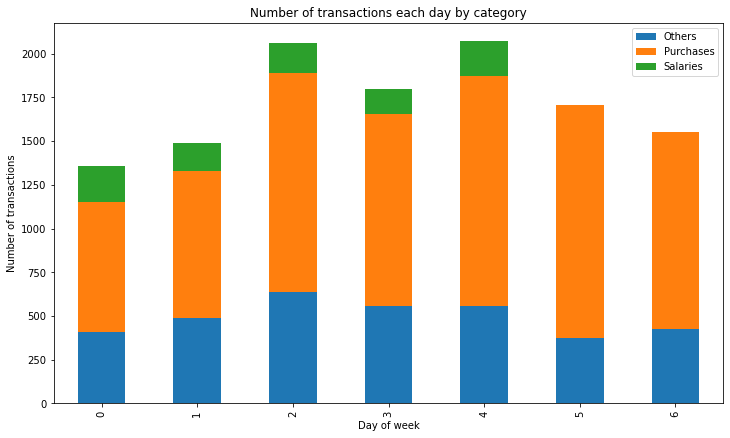

In [194]:
stacked_barplot = pd.DataFrame(data.groupby(["dayofweek", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12, 7))
plt.title("Number of transactions each day by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Day of week")


No salaries were paid on Saturday and Sunday, therefore lower average transaction volume on those days

In [196]:
avg_hourly_volume = pd.DataFrame(data.groupby('hour').amount.mean())
avg_hourly_volume.head()

,amount
hour,
00,28.274907
01,48.716402
02,75.269764
03,84.725918
04,61.301845


Text(0.5, 0, 'Hour')

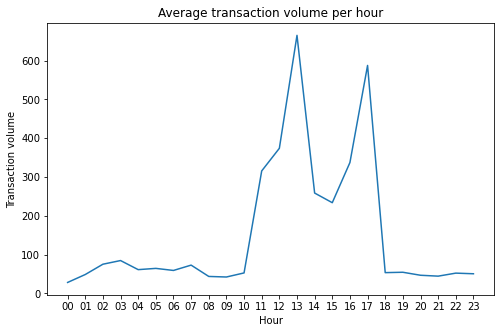

In [199]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(avg_hourly_volume.index, avg_hourly_volume.amount)
plt.title("Average transaction volume per hour")
plt.ylabel("Transaction volume")
plt.xlabel("Hour")


Text(0.5, 0, 'Hour')

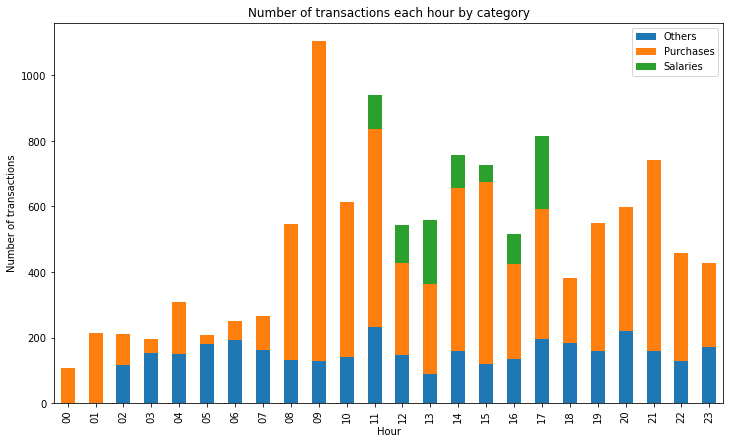

In [200]:
stacked_barplot = pd.DataFrame(data.groupby(["hour", "category"]).amount.count())
stacked_barplot.unstack().plot(kind = "bar", stacked = True, figsize = (12, 7))
plt.title("Number of transactions each hour by category")
plt.legend(["Others", "Purchases", "Salaries"])
plt.ylabel("Number of transactions")
plt.xlabel("Hour")


In [201]:
data.to_pickle("data.pkl")